In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [12]:
# Load the data from the Excel file
data = pd.read_excel('../classif.xlsx')

# Display the first few rows of the dataframe to understand its structure
print(data.head())
print(data.dtypes)

   ID bug type         species
0   1      Bee  Apis mellifera
1   2      Bee  Apis mellifera
2   3      Bee  Apis mellifera
3   4      Bee  Apis mellifera
4   5      Bee  Apis mellifera
ID           int64
bug type    object
species     object
dtype: object


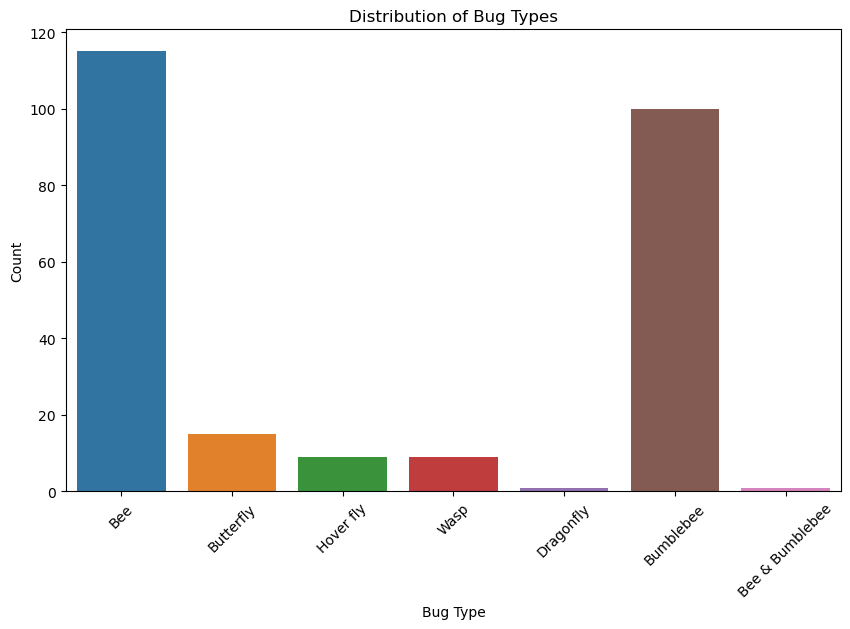

In [3]:
# Example 1: Bar Chart for Bug Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='bug type', data=data)
plt.title('Distribution of Bug Types')
plt.xlabel('Bug Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x labels for better readability
plt.show()



In [4]:
#Pie Chart for Species Distribution
# Calculate species counts
species_counts = data['species'].value_counts()

# Calculate 5% of the total
total = species_counts.sum()
five_percent = total * 0.05

In [5]:
# Filter species by 5% threshold and group others as 'Other'
filtered_species_counts = species_counts[species_counts >= five_percent]
other_species_count = species_counts[species_counts < five_percent].sum()

# If there are any species in the 'Other' category, add it
if other_species_count > 0:
    filtered_species_counts['Other'] = other_species_count


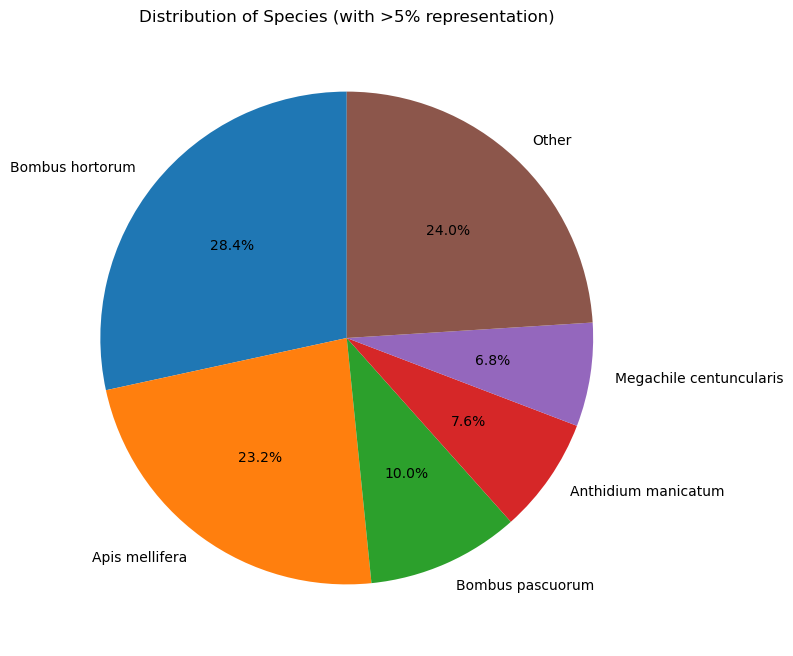

In [6]:
# Pie Chart for Species Distribution with 'Other' category
plt.figure(figsize=(8, 8))
plt.pie(filtered_species_counts, labels=filtered_species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Species (with >5% representation)')
plt.show()


In [19]:
# Define a function to encode categories with frequencies above 5%
def encode_frequent_categories(data, column_name):
    # Calculate the frequency of each category
    frequency = data[column_name].value_counts(normalize=True)
    # Categories above 5% threshold
    frequent_categories = frequency[frequency > 0.05].index
    # Map each category to a number, less frequent categories grouped as 'Other'
    category_to_number = {category: idx + 1 for idx, category in enumerate(frequent_categories)}
    # Assign all other less frequent categories to 'Other'
    category_to_number.update({category: 0 for category in frequency.index if category not in frequent_categories})
    # Replace the categories in the dataframe with their assigned numbers
    return data[column_name].map(category_to_number)

# Encode 'bug type' and 'species'
data['bug type'] = encode_frequent_categories(data, 'bug type')
data['species'] = encode_frequent_categories(data, 'species')

# Print all unique values and their counts in the 'bug type' column
print("Encoded bug type Values and their Counts:")
print(data['bug type'].value_counts())

# Print all unique values and their counts in the 'species' column
print("Encoded Species Values and their Counts:")
print(data['species'].value_counts())

# Display the modified DataFrame
print(data.sample(10))  # Randomly select and show 10 rows, to be sure that it's well encoded.


Encoded bug type Values and their Counts:
bug type
1    115
2    100
3     20
4     15
Name: count, dtype: int64
Encoded Species Values and their Counts:
species
1    71
2    60
3    58
4    25
5    19
6    17
Name: count, dtype: int64
      ID  bug type  species
83    84         2        1
233  234         4        2
7      8         1        3
243  244         1        3
222  223         1        2
119  120         2        1
34    35         1        3
20    21         1        3
210  211         1        2
159  160         1        6


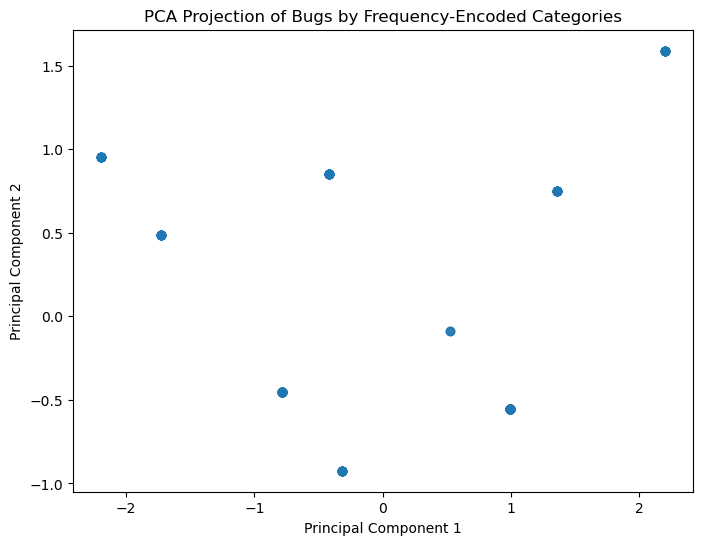

In [21]:


# Now, standardize the numeric data (excluding 'ID' as it is an identifier)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['bug type', 'species']])  # Assuming these are the only features now

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Bugs by Frequency-Encoded Categories')
plt.show()